In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error ,mean_absolute_error,explained_variance_score,mean_squared_log_error,r2_score,f1_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synon

In [2]:
data = pd.read_csv('../Files tcc/data.csv',index_col=['Data'])
data.head()

,Fechamento
Data,
01-01-2015,314.25
02-01-2015,315.03
03-01-2015,281.08
04-01-2015,264.20
05-01-2015,274.47


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text xticklabel objects>)

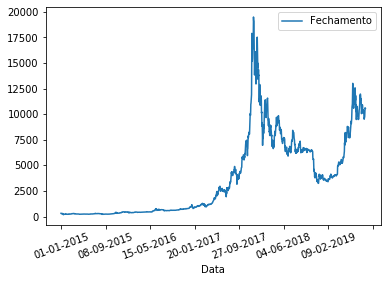

In [18]:
data.plot()
plt.xticks(rotation=20)

In [3]:
df = data[['Fechamento']]
dataset = df.values
dataset = dataset.astype('float32')
dataset

array([[  314.25],
       [  315.03],
       [  281.08],
       ...,
       [10623.54],
       [10594.49],
       [10575.53]], dtype=float32)

In [4]:
escalonador = MinMaxScaler(feature_range=(0,1))
dataset = escalonador.fit_transform(dataset)

In [5]:
train_size = int(len(dataset)*0.67)
teste_size = len(dataset) - train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train), len(test))

1145 564


In [6]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [7]:
def antes(dataset,look_back=1):
    dia_atras = []
    for i in range(len(dataset)-look_back-1):
        dia_atras.append(dataset[i-1+look_back, 0])
    
    return np.array(dia_atras)

In [8]:
look_back=3
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test,look_back=look_back)
dia_atras = antes(test,look_back=look_back)
print(len(trainX),len(trainY),len(testX),len(testY),len(dia_atras))

1141 1141 560 560 560


In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
modelo = Sequential()
modelo.add(LSTM(4, input_shape=(1, look_back)))
modelo.add(Dense(1))
modelo.compile(loss='mean_squared_error', optimizer='adam')
modelo.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)


Epoch 1/100
 - 0s - loss: 0.0453
Epoch 2/100
 - 0s - loss: 0.0433
Epoch 3/100
 - 0s - loss: 0.0412
Epoch 4/100
 - 0s - loss: 0.0393
Epoch 5/100
 - 0s - loss: 0.0377
Epoch 6/100
 - 0s - loss: 0.0360
Epoch 7/100
 - 0s - loss: 0.0346
Epoch 8/100
 - 0s - loss: 0.0333
Epoch 9/100
 - 0s - loss: 0.0321
Epoch 10/100
 - 0s - loss: 0.0312
Epoch 11/100
 - 0s - loss: 0.0302
Epoch 12/100
 - 0s - loss: 0.0293
Epoch 13/100
 - 0s - loss: 0.0285
Epoch 14/100
 - 0s - loss: 0.0278
Epoch 15/100
 - 0s - loss: 0.0270
Epoch 16/100
 - 0s - loss: 0.0263
Epoch 17/100
 - 0s - loss: 0.0256
Epoch 18/100
 - 0s - loss: 0.0248
Epoch 19/100
 - 0s - loss: 0.0241
Epoch 20/100
 - 0s - loss: 0.0234
Epoch 21/100
 - 0s - loss: 0.0226
Epoch 22/100
 - 0s - loss: 0.0218
Epoch 23/100
 - 0s - loss: 0.0210
Epoch 24/100
 - 0s - loss: 0.0202
Epoch 25/100
 - 0s - loss: 0.0194
Epoch 26/100
 - 0s - loss: 0.0186
Epoch 27/100
 - 0s - loss: 0.0178
Epoch 28/100
 - 0s - loss: 0.0169
Epoch 29/100
 - 0s - loss: 0.0161
Epoch 30/100
 - 0s - l

In [11]:
trainPredicao = modelo.predict(trainX)
testPredicao = modelo.predict(testX)

In [12]:
trainPredicao = escalonador.inverse_transform(trainPredicao)
trainY = escalonador.inverse_transform([trainY])
testPredicao = escalonador.inverse_transform(testPredicao)
testY = escalonador.inverse_transform([testY])
print(testPredicao[0])
dia_atras = escalonador.inverse_transform([dia_atras])

[11206.221]


In [13]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredicao[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredicao[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))
mse = mean_squared_error(testY[0], testPredicao[:, 0])
print('MSE test :%2f ' % (mse))
testY = np.reshape(testY,(560,1))
dia_atras = np.reshape(dia_atras,(560,1))


Train Score: 348.19 RMSE
Test Score: 377.23 RMSE
MSE test :142304.705973 


In [14]:
trainPredicaoplot = np.empty_like(dataset)
trainPredicaoplot[:, :] = np.nan
trainPredicaoplot[look_back:len(trainPredicao) + look_back, :] = trainPredicao

In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

LSTM
MAPE: 95.971
Desvio: 4.029
MSE: 142304.706
RMSE: 377.233
MAE: 274.395
MSLE: 0.003
R2 score: 97.444
Explaine Variance Score: 97.448


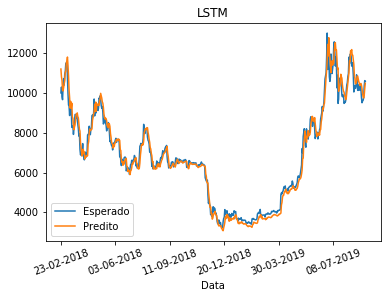

In [16]:
print('LSTM')
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(testY,testPredicao)))
print('Desvio: %.3f'%mean_absolute_percentage_error(testY,testPredicao))
print("MSE: %.3f"%mean_squared_error(testY,testPredicao))
print("RMSE: %.3f"%sqrt(mean_squared_error(testY,testPredicao)))
print("MAE: %.3f"%mean_absolute_error(testY,testPredicao))
print("MSLE: %.3f"%mean_squared_log_error(testY,testPredicao))
print("R2 score: %.3f"%(r2_score(testY,testPredicao)*100))
print("Explaine Variance Score: %.3f"%(explained_variance_score(testY,testPredicao)*100))
resultado = pd.DataFrame(testY,columns=['Esperado'])
resultado['Predito'] = testPredicao
resultado.index = data.tail(560).index
resultado.plot()
plt.xticks(rotation=20)
plt.title('LSTM')
plt.savefig('LSTM_teste.png')   